# Electric Power Consumption Dataset

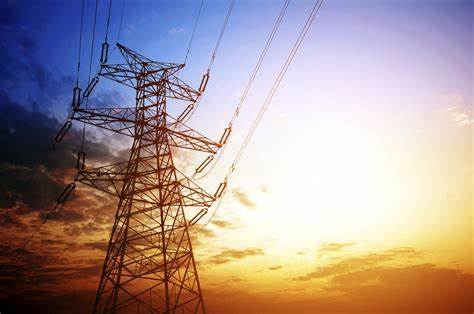

In [23]:
from IPython.display import Image
Image(filename='electricity.jpg') 

# Loading the Libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import scale

In [2]:
dataset = pd.read_csv('household_power_consumption.txt', delimiter = ';', low_memory = False)
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# We take the first 2000 entries to train our model

In [3]:
dataset_sample = dataset.sample(2000)
dataset_sample.shape

(2000, 9)

In [4]:
dataset_sample.isna().sum()

Date                      0
Time                      0
Global_active_power       0
Global_reactive_power     0
Voltage                   0
Global_intensity          0
Sub_metering_1            0
Sub_metering_2            0
Sub_metering_3           27
dtype: int64

# Removing Null Values and "?"s

In [5]:
dataset_sample = dataset_sample.fillna(0).drop(["Date", "Time"],axis=1)
dataset_sample.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [6]:
count = 0
for i in dataset_sample:
    for j in dataset_sample[i]:
        if j == '?': count += 1
print("'?' fields: " + str(count))

'?' fields: 162


In [7]:
rows = [x if "?" in dataset_sample.iloc[[x]].values else "Null" for x in range(len(dataset_sample))]
rows = [x for x in rows if x != "Null"]

In [8]:
dataset_sample = dataset_sample.drop(dataset_sample.index[rows], 0)
count = 0
for i in dataset_sample:
    for j in dataset_sample[i]:
        if j == '?': count += 1
print("'?' fields: " + str(count))

'?' fields: 0


In [9]:
X = scale(dataset_sample)

# Finding the perfect K value using elbow method

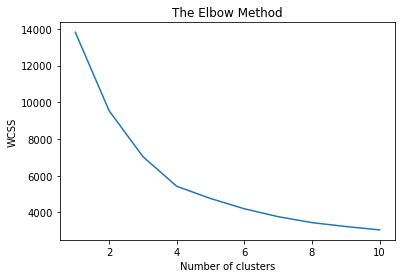

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Clustering Using KMeans 

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
labels = kmeans.labels_

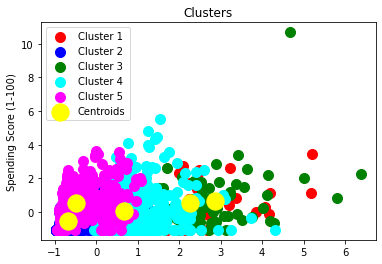

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
silhouette_value = silhouette_score(X, labels)
silhouette_value

0.30464526116685425

# Using Heirarchical clustering  

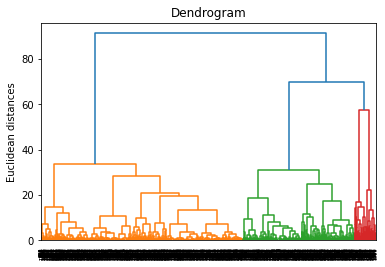

In [14]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()


In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
labels2= hc.labels_

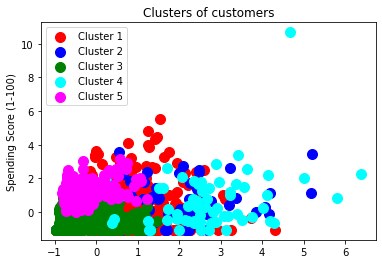

In [24]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
silhouette_value = silhouette_score(X, labels2)
silhouette_value

0.30633563856655466